In [1]:
using Plots
using CSV
using DataFrames

In [2]:
tourneys_dir = "/home/bryan/Projects/Catan/CatanLearning.jl/models"
tournament_id = 55663

root_dir = joinpath(tourneys_dir, "tournament_$tournament_id")

"/home/bryan/Projects/Catan/CatanLearning.jl/models/tournament_55663"

In [3]:
(root, dirs, files) = collect(walkdir(root_dir))[1]
teams = [Symbol(replace(f, r"\d*_(.*)\.csv" => s"\1")) for f in files[1:4]]

println(teams)
num_epochs = convert(Int, length(files) / length(teams))
println(num_epochs)
println(files)

[:blue, :cyan, :green, :yellow]
25
["10_blue.csv", "10_cyan.csv", "10_green.csv", "10_yellow.csv", "11_blue.csv", "11_cyan.csv", "11_green.csv", "11_yellow.csv", "12_blue.csv", "12_cyan.csv", "12_green.csv", "12_yellow.csv", "13_blue.csv", "13_cyan.csv", "13_green.csv", "13_yellow.csv", "14_blue.csv", "14_cyan.csv", "14_green.csv", "14_yellow.csv", "15_blue.csv", "15_cyan.csv", "15_green.csv", "15_yellow.csv", "16_blue.csv", "16_cyan.csv", "16_green.csv", "16_yellow.csv", "17_blue.csv", "17_cyan.csv", "17_green.csv", "17_yellow.csv", "18_blue.csv", "18_cyan.csv", "18_green.csv", "18_yellow.csv", "19_blue.csv", "19_cyan.csv", "19_green.csv", "19_yellow.csv", "1_blue.csv", "1_cyan.csv", "1_green.csv", "1_yellow.csv", "20_blue.csv", "20_cyan.csv", "20_green.csv", "20_yellow.csv", "21_blue.csv", "21_cyan.csv", "21_green.csv", "21_yellow.csv", "22_blue.csv", "22_cyan.csv", "22_green.csv", "22_yellow.csv", "23_blue.csv", "23_cyan.csv", "23_green.csv", "23_yellow.csv", "24_blue.csv", "24_cyan

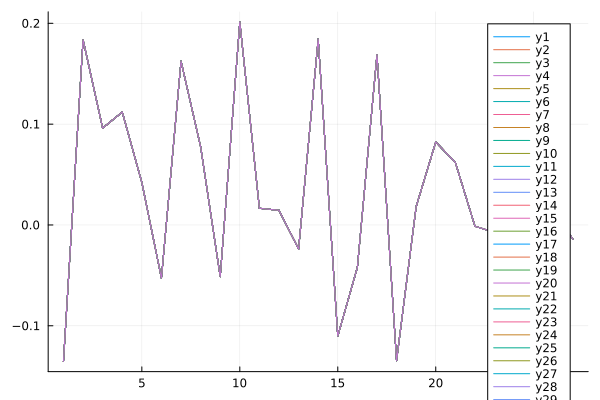

In [8]:
fname(k, t::Symbol) = joinpath(root_dir, "$(k)_$t.csv")
plt = plot()
d = Dict()
for k=1:num_epochs
    for t = teams
        #println("plotting epoch $k / $num_epochs - $t")
        weights = CSV.read(fname(k,t), DataFrame)[!,:Weights]
        d[(k,t)] = weights
        plot!(weights)
        #plot!(weights)
    end
end
plt


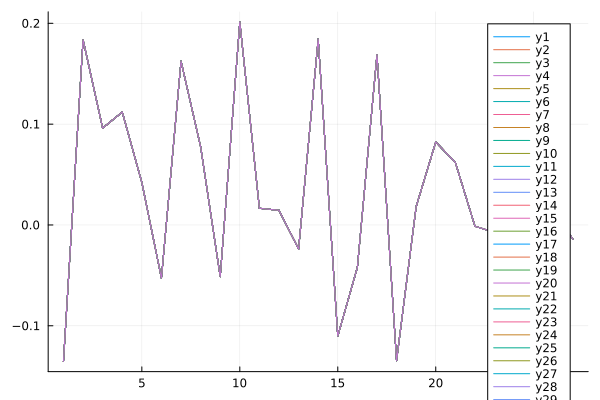

In [5]:
plt

In [9]:
d

Dict{Any, Any} with 100 entries:
  (4, :green)   => [-0.135353, 0.183666, 0.0960633, 0.112004, 0.0421466, -0.052…
  (13, :green)  => [-0.135353, 0.183666, 0.0960633, 0.112004, 0.0421466, -0.052…
  (5, :blue)    => [-0.135353, 0.183666, 0.0960633, 0.112004, 0.0421466, -0.052…
  (21, :cyan)   => [-0.135353, 0.183666, 0.0960633, 0.112004, 0.0421466, -0.052…
  (21, :yellow) => [-0.135353, 0.183666, 0.0960633, 0.112004, 0.0421466, -0.052…
  (6, :blue)    => [-0.135353, 0.183666, 0.0960633, 0.112004, 0.0421466, -0.052…
  (12, :green)  => [-0.135353, 0.183666, 0.0960633, 0.112004, 0.0421466, -0.052…
  (23, :green)  => [-0.135353, 0.183666, 0.0960633, 0.112004, 0.0421466, -0.052…
  (11, :green)  => [-0.135353, 0.183666, 0.0960633, 0.112004, 0.0421466, -0.052…
  (24, :cyan)   => [-0.135353, 0.183666, 0.0960633, 0.112004, 0.0421466, -0.052…
  (24, :yellow) => [-0.135353, 0.183666, 0.0960633, 0.112004, 0.0421466, -0.052…
  (8, :cyan)    => [-0.135353, 0.183666, 0.0960633, 0.112004, 0.0421466, -0.